 
 - https://www.kaggle.com/themlphdstudent/cheat-sheet-seaborn-charts
 - https://seaborn.pydata.org/introduction.html
 - https://seaborn.pydata.org/tutorial.html
 - https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
 - https://medium.com/@neuralnets/statistical-data-visualization-series-with-python-and-seaborn-for-data-science-5a73b128851d
 - https://medium.com/@ppeng08/interactive-visualization-for-exploratory-data-analysis-in-jupyter-notebook-adc826e1e76a
 - https://gist.github.com/noklam/ddd503085c5aa0c27ddb0eceb4a2f07b
 -  
 - https://python.quantecon.org/index_toc.html

In [16]:
import seaborn as sns
import pandas as pd
import ipywidgets

iris_df = pd.read_csv("iris.csv")
iris_df.head()

data_df = iris_df
data_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Style and theme

To activate default theme of seaborn : sns.set_theme()

To activate style : 
```python
sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("white")
sns.set_style("ticks")
```

To set context : 
```python
sns.set_context("paper")
sns.set_context("notebook")
sns.set_context("talk")
sns.set_context("poster")
```

In [12]:
sns.set_theme()
sns.set_style("darkgrid")

To remove top and right axes spines : sns.despine()
```python
sns.despine(offset=10, trim=True);
sns.despine(left=True)
```

Style can be used in context : 
```python
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()
```

In [7]:
#darkgrid, whitegrid, dark, white, and ticks


In [8]:
@ipywidgets.interact
def plot(col=data_df.select_dtypes(include = 'category').columns):          # categorical univariate plot
    sns.countplot(y=col, data=data_df);                                     # y indicates horizontal plot

interactive(children=(Dropdown(description='col', options=(), value=None), Output()), _dom_classes=('widget-in…

## Datasets 
ong-form data table has the following characteristics:

·       Each variable is a column
·       Each observation is a row
Dict_data = {“age”:[1, 2, 3],
                            “height”:[]}

<AxesSubplot:xlabel='sepal.length', ylabel='Count'>

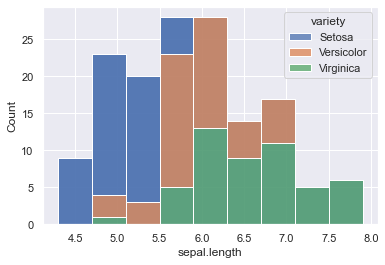

In [17]:
sns.histplot(data=data_df, x="sepal.length", multiple="stack")
sns.histplot(data=data_df, x="sepal.length", hue="variety", multiple="stack")

<AxesSubplot:xlabel='sepal.width', ylabel='Density'>

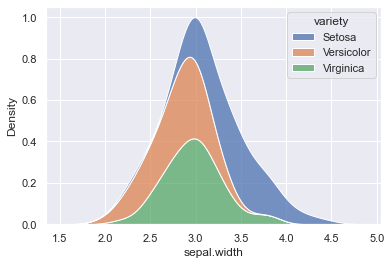

In [18]:
sns.kdeplot(data=data_df, x="sepal.width", hue="variety", multiple="stack")

<AxesSubplot:xlabel='sepal.width', ylabel='Count'>

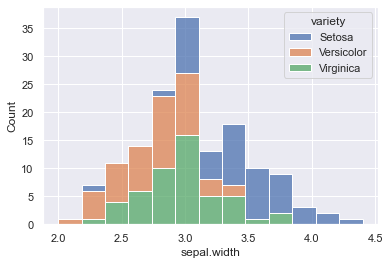

In [19]:
sns.histplot(data=data_df, x="sepal.width", hue="variety", multiple="stack")

# Distribution plot : 1d numerical data

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal.width', ylabel='Density'>

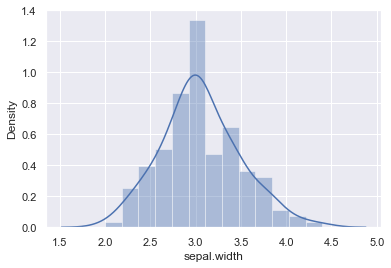

In [22]:
sns.distplot(data_df['sepal.width'])

<AxesSubplot:xlabel='sepal.width', ylabel='Density'>

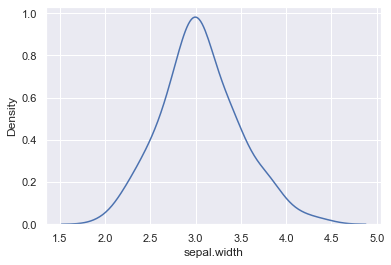

In [29]:
sns.kdeplot(data_df['sepal.width'])

<AxesSubplot:ylabel='sepal.width'>

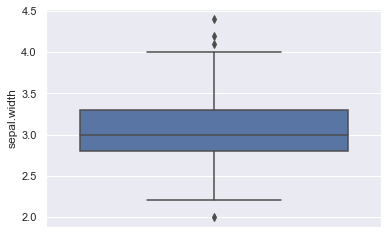

In [28]:
sns.boxplot(y=data_df['sepal.width'])  # can switch to x

<AxesSubplot:ylabel='sepal.width'>

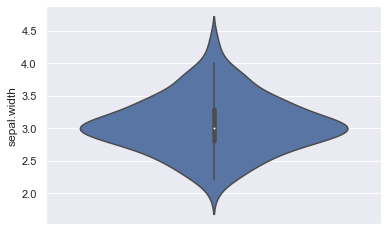

In [25]:
sns.violinplot(y=data_df['sepal.width']) # can switch to x

# Distribution : nd numerical data

<AxesSubplot:xlabel='petal.width', ylabel='Density'>

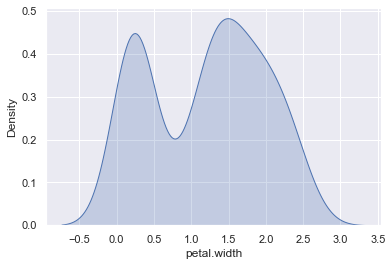

In [31]:
sns.kdeplot(data_df['petal.width'], shade=True)

<AxesSubplot:xlabel='petal.width', ylabel='Density'>

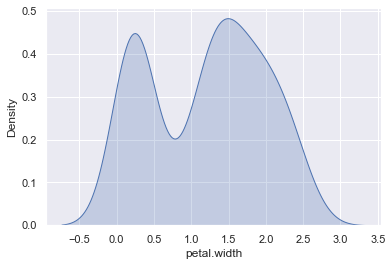

In [32]:
sns.kdeplot(data_df['petal.width'], shade=True)

<AxesSubplot:>

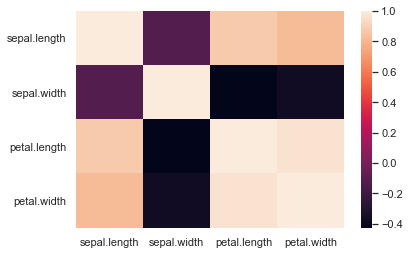

In [35]:
sns.heatmap(data_df.corr())

<AxesSubplot:>

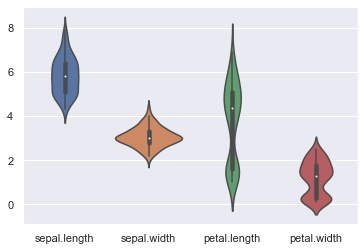

In [36]:
sns.violinplot(data=data_df)

# 1d numerical with 1d categorical

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

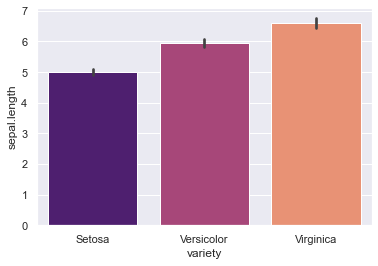

In [37]:
sns.barplot(x='variety', y='sepal.length', data=data_df, palette='magma')

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

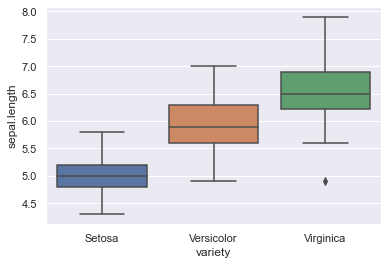

In [38]:
sns.boxplot(x=data_df['variety'], y=data_df['sepal.length'])

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

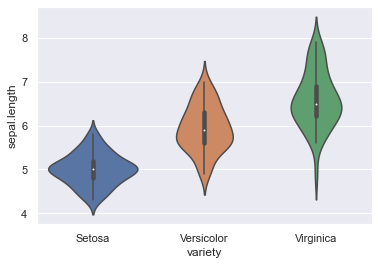

In [39]:
sns.violinplot(x=data_df['variety'], y=data_df["sepal.length"])

<AxesSubplot:xlabel='sepal.length', ylabel='variety'>

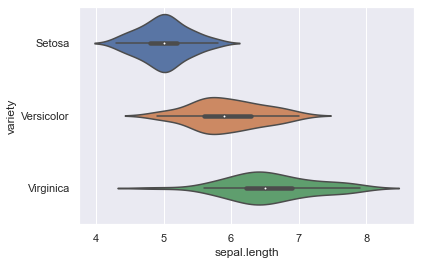

In [41]:
sns.violinplot(y=data_df['variety'], x=data_df['sepal.length'])

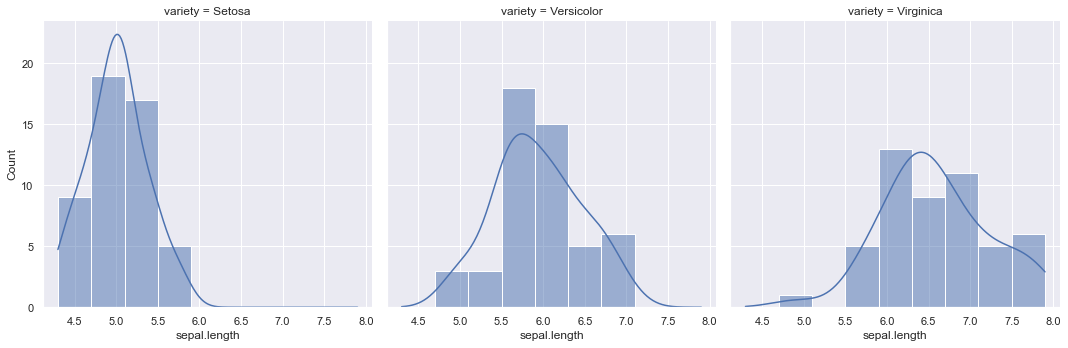

In [43]:
sns.displot(data=data_df, x="sepal.length", col="variety", kde=True)

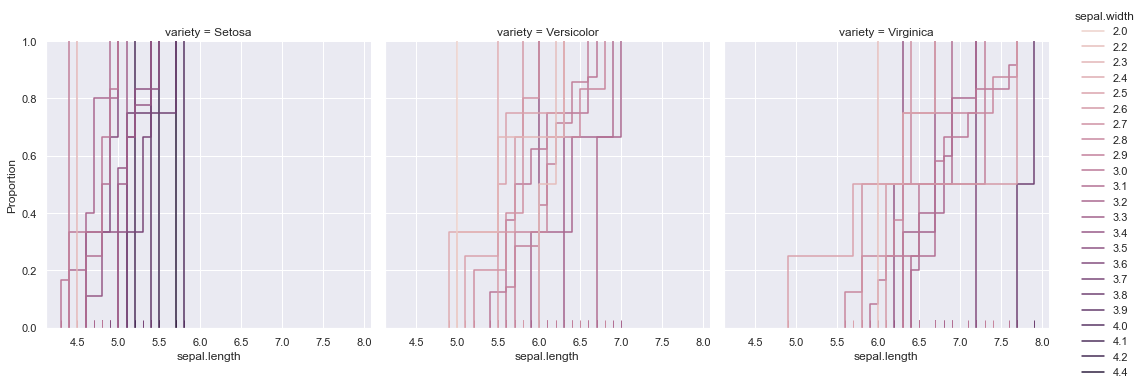

In [44]:
sns.displot(data=data_df, kind="ecdf", x="sepal.length", col="variety", hue="sepal.width", rug=True)
# changer hue pour du catégorical

# 3d numerical data

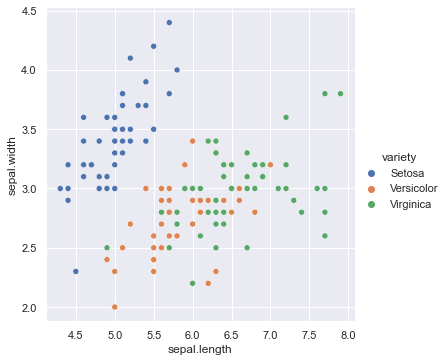

In [45]:
sns.relplot(
    data=data_df,
    x="sepal.length", y="sepal.width", hue="variety"
)

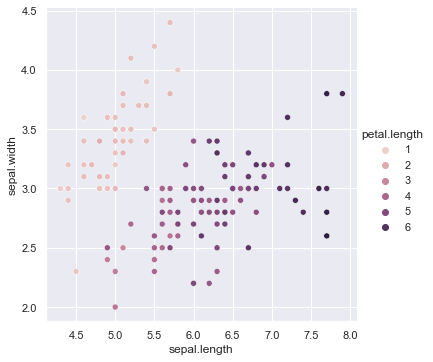

In [46]:
sns.relplot(
    data=data_df,
    x="sepal.length", y="sepal.width", hue="petal.length"
)

# nd numerical 1d categorical

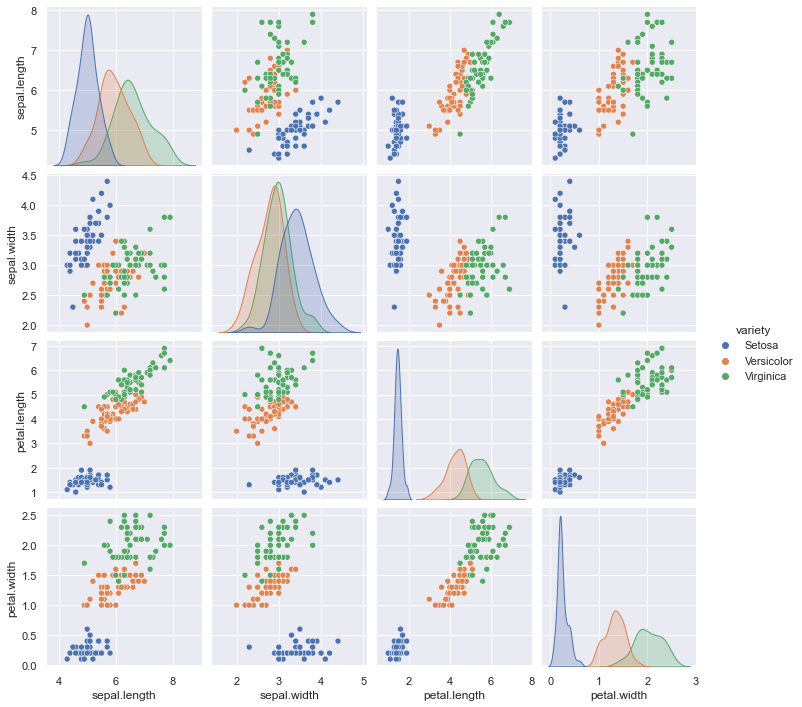

In [47]:
sns.pairplot(data=data_df, hue="variety")

# nd categorical 1d numerical

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


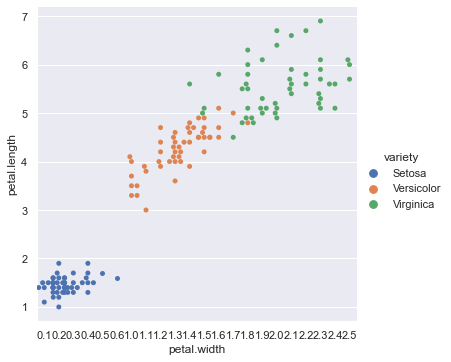

In [49]:
sns.catplot(data=data_df, kind="swarm", x="petal.width", y="petal.length", hue="variety")

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
 
nd numerical with nd categorical
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
 
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
 
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
 
# Scatter plot : 2d numerical data
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)
sns.lineplot(x='Age', y='Height', data=olympic) : line with uncertainties beam
sns.kdeplot(iris['SepalLengthCm'], iris['SepalWidthCm'])
 
 
# scatter plot with categorical : 2d numerical data with 1 categorical feature
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
sns.lineplot(x='Age', y='Height', data=olympic, hue='Sex')
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
 
 
 
# seaborn
 
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
 
Set style : sns.set_style("whitegrid")
 
sns.set_style("whitegrid") Set the matplotlib parameters
sns.set_style("ticks", Set the matplotlib parameters
{"xtick.major.size":8, "ytick.major.size":8})
sns.axes_style("whitegrid") Return a dict of params or use with with to temporarily set the style
 
 
Scatterplot
sns.stripplot(x="species", Scatterplot with one y="petal_length", categorical variable data=iris)
sns.swarmplot(x="species", Categorical scatterplot with y="petal_length", non-overlapping points data=iris)
Bar Chart
sns.barplot(x="sex", Show point estimates and y="survived", confidence intervals with hue="class", scatterplot glyphs data=titanic)
Count Plot
sns.countplot(x="deck", Show count of observations data=titanic, palette="Greens_d")
Point Plot
sns.pointplot(x="class", Show point estimates and y="survived", confidence intervals as hue="sex", rectangular bars data=titanic, palette={"male":"g", "female":"m"}, markers=["^","o"], linestyles=["-","--"])
Boxplot
sns.boxplot(x="alive", Boxplot y="age", hue="adult_male", data=titanic)
sns.boxplot(data=iris,orient="h")
Boxplot with wide-form data Violinplot
sns.violinplot(x="age", Violin plot y="sex", hue="survived", data=titanic)
 
Regression plot
sns.regplot(x="sepal_width", Plot data and a linear regression y="sepal_length", model fit data=iris, ax=ax)
 
Distribution plot
> plot = sns.distplot(data.y, Plot univariate distribution kde=False, color="b")
 
>> h = sns.PairGrid(iris) Subplot grid for plotting pairwise >>> h = h.map(plt.scatter) relationships >>> sns.pairplot(iris) Plot pairwise bivariate distributions >>> i = sns.JointGrid(x="x", Grid for bivariate plot with marginal y="y", univariate plots data=data) >>> i = i.plot(sns.regplot, sns.distplot) >>> sns.jointplot("sepal_length", Plot bivariate distribution "sepal_width", data=iris, kind='kde')
 
Matrix plot heatmap
sns.heatmap(uniform_data,vmin=0,vmax=1)
 
Numpy dtype and structured array :
 
https://stackoverflow.com/questions/2350072/custom-data-types-in-numpy-arrays
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]
 
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
 
data
 
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)
 
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])
 
kerneldt = np.dtype([('myintname', np.int32), ('myfloats', np.float64, 9)])
arr = np.empty(dims, dtype=kerneldt)